In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [2]:
df_math = pd.read_csv('student_math.csv')
df_math[['activities', 'internet' ,'romantic']] = df_math[['activities', 'internet', 'romantic']].replace({'yes' : 1, 'no' : 0})
df_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df_port = pd.read_csv('student_portuguese.csv')
df_port[['activities', 'internet' ,'romantic']] = df_port[['activities', 'internet', 'romantic']].replace({'yes' : 1, 'no' : 0})
df_port

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Linear Regression on the Students Math Class Performance

In [4]:
X = df_math[['traveltime', 'studytime', 'failures','activities', 'internet', 'romantic','famrel','freetime', 'goout', 'absences']]
y = df_math['G3']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
print('R2 score on test: {:.3f}'.format(model.score(X_test, y_test)))

R2 score on test: 0.078


In [8]:
print('Coefficients: {}'.format(model.coef_))

Coefficients: [-0.07036921  0.45485722 -2.19851804 -0.42563776  0.52725737 -1.10482097
 -0.01762488  0.55921422 -0.4657953   0.04969065]


In [9]:
feature_importance = pd.Series(model.coef_, index=['traveltime', 'studytime', 'failures','activities', 'internet', 'romantic','famrel','freetime', 'goout', 'absences'])
feature_importance

traveltime   -0.070369
studytime     0.454857
failures     -2.198518
activities   -0.425638
internet      0.527257
romantic     -1.104821
famrel       -0.017625
freetime      0.559214
goout        -0.465795
absences      0.049691
dtype: float64

In [10]:
feature_importance = feature_importance.abs()
feature_importance

traveltime    0.070369
studytime     0.454857
failures      2.198518
activities    0.425638
internet      0.527257
romantic      1.104821
famrel        0.017625
freetime      0.559214
goout         0.465795
absences      0.049691
dtype: float64

In [11]:
import matplotlib.pyplot as plt

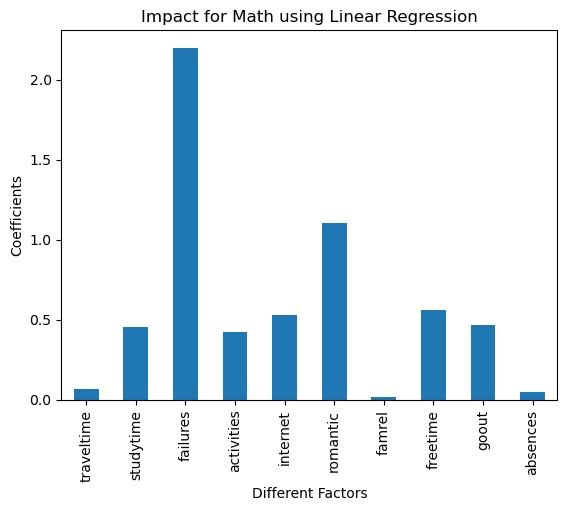

In [12]:
feature_importance.plot(kind='bar')
plt.title('Impact for Math using Linear Regression')
plt.xlabel('Different Factors')
plt.ylabel('Coefficients')
plt.show()

# Higher coeeficient means higher impact

## Linear Regression on the Students Portuguese Class Performance

In [13]:
X = df_port[['traveltime', 'studytime', 'failures','activities', 'internet', 'romantic','famrel','freetime', 'goout', 'absences']]
y = df_port['G3']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print('R2 score on test: {:.3f}'.format(model.score(X_test, y_test)))

R2 score on test: 0.211


In [17]:
print('Coefficients: {}'.format(model.coef_))

Coefficients: [-0.18866588  0.91644443 -1.67855909  0.11869557  0.68011154 -0.53447767
  0.15253376 -0.31675274 -0.12017787 -0.01958161]


In [18]:
feature_importance = pd.Series(model.coef_, index=['traveltime', 'studytime', 'failures','activities', 'internet', 'romantic','famrel','freetime', 'goout', 'absences'])
feature_importance

traveltime   -0.188666
studytime     0.916444
failures     -1.678559
activities    0.118696
internet      0.680112
romantic     -0.534478
famrel        0.152534
freetime     -0.316753
goout        -0.120178
absences     -0.019582
dtype: float64

In [19]:
feature_importance = feature_importance.abs()
feature_importance

traveltime    0.188666
studytime     0.916444
failures      1.678559
activities    0.118696
internet      0.680112
romantic      0.534478
famrel        0.152534
freetime      0.316753
goout         0.120178
absences      0.019582
dtype: float64

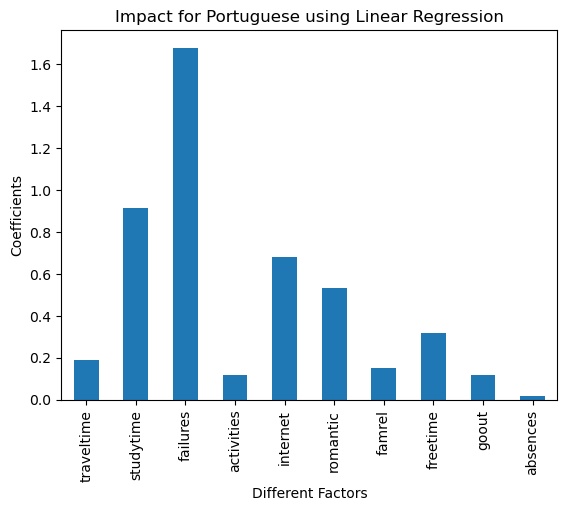

In [20]:
feature_importance.plot(kind='bar')
plt.title('Impact for Portuguese using Linear Regression')
plt.xlabel('Different Factors')
plt.ylabel('Coefficients')
plt.show()

# Higher coeeficient means higher impact

## K-Nearest Neighbors on Math Class

In [21]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

In [22]:
X = df_math[['traveltime', 'studytime', 'failures','activities', 'internet', 'romantic','famrel','freetime', 'goout', 'absences']]
y = df_math['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = neighbors.KNeighborsClassifier(5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 37.14141414141414


In [24]:
feature_importance = X_train.mean()
feature_importance

traveltime    1.452703
studytime     2.043919
failures      0.344595
activities    0.516892
internet      0.817568
romantic      0.331081
famrel        3.915541
freetime      3.246622
goout         3.104730
absences      5.777027
dtype: float64

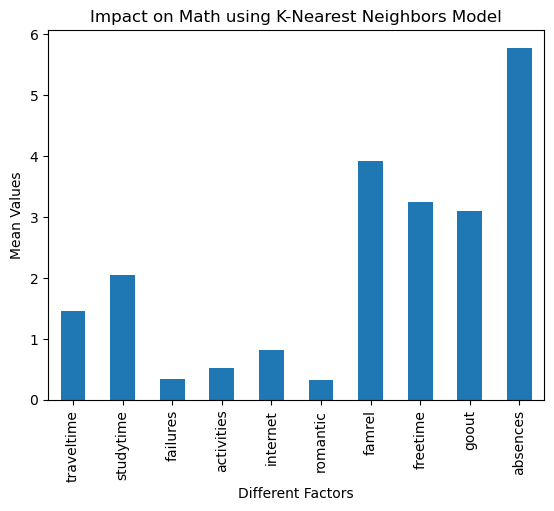

In [25]:
feature_importance.plot(kind='bar')
plt.title('Impact on Math using K-Nearest Neighbors Model')
plt.xlabel('Different Factors')
plt.ylabel('Mean Values')
plt.show()

## K-Nearest Neighbors on Portuguese Class

In [26]:
X = df_port[['traveltime', 'studytime', 'failures','activities', 'internet', 'romantic','famrel','freetime', 'goout', 'absences']]
y = df_port['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = neighbors.KNeighborsClassifier(5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13.521472392638037


In [28]:
feature_importance = X_train.mean()
feature_importance

traveltime    1.561728
studytime     1.934156
failures      0.222222
activities    0.493827
internet      0.765432
romantic      0.372428
famrel        3.954733
freetime      3.162551
goout         3.203704
absences      3.621399
dtype: float64

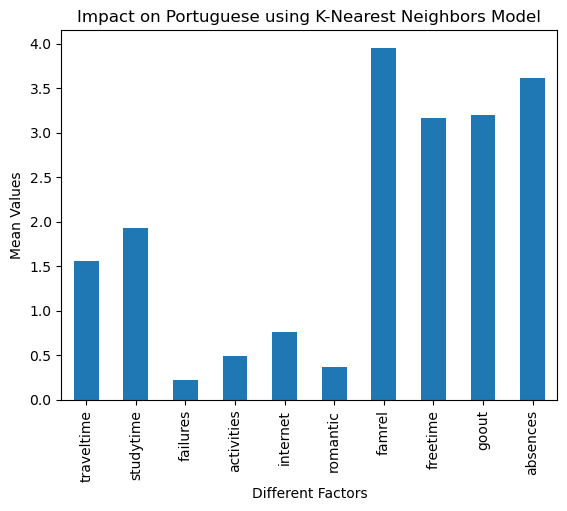

In [29]:
feature_importance.plot(kind='bar')
plt.title('Impact on Portuguese using K-Nearest Neighbors Model')
plt.xlabel('Different Factors')
plt.ylabel('Mean Values')
plt.show()